In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import data set
data = pd.read_csv('../Dataset/US_Accidents_March23_sampled_500k.csv')

In [3]:
df = data.copy()
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
# checking datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [6]:
# fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

Text(0.5, 1.0, 'count by severity')

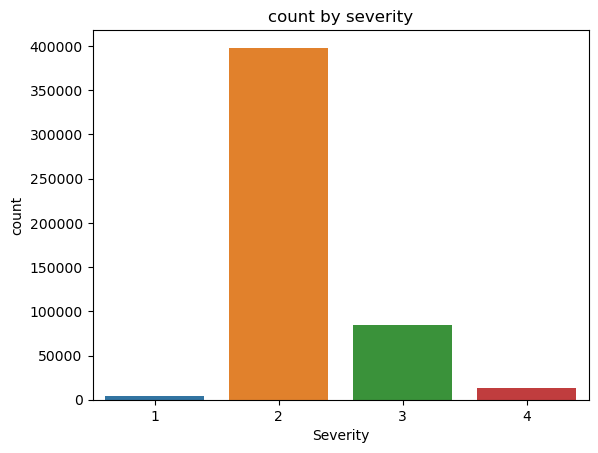

In [7]:
sns.countplot(data=df, x=df['Severity'])
plt.title("count by severity")

In [9]:
# check for null values
missing_df = (df.isnull().sum()/df.shape[0])*100
missing_df.sort_values(ascending=False)

End_Lat                  44.0754
End_Lng                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Nautical_Twilight         0.2966
Civil_Twilight            0.2966
Sunrise_Sunset            0.2966
Astronomical_Twilight     0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
Traffic_Signal            0.0000
Roundabout                0.0000
Station                   0.0000
Stop                      0.0000
Traffic_Calming           0.0000
Country                   0.0000
Turning_Loop              0.0000
No_Exit                   0.0000
End_Time  

In [10]:
# removing unwanted features
df = df.drop(['ID','Source','End_Lat','End_Lng','Description','End_Time','Country','Wind_Chill(F)','Weather_Timestamp'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               500000 non-null  int64         
 1   Start_Time             500000 non-null  datetime64[ns]
 2   Start_Lat              500000 non-null  float64       
 3   Start_Lng              500000 non-null  float64       
 4   Distance(mi)           500000 non-null  float64       
 5   Street                 499309 non-null  object        
 6   City                   499981 non-null  object        
 7   County                 500000 non-null  object        
 8   State                  500000 non-null  object        
 9   Zipcode                499884 non-null  object        
 10  Timezone               499493 non-null  object        
 11  Airport_Code           498554 non-null  object        
 12  Temperature(F)         489534 non-null  floa

In [13]:
col_boolean = df.select_dtypes(['bool'])
col_boolean_col = col_boolean.columns.to_list()
col_boolean_col

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

In [14]:
for col in col_boolean_col:
    print(col, ":",col_boolean[col].value_counts())
    print(((col_boolean[col_boolean[col] == True].shape[0])/col_boolean.shape[0])*100,"\n")

Amenity : False    493809
True       6191
Name: Amenity, dtype: int64
1.2382 

Bump : False    499789
True        211
Name: Bump, dtype: int64
0.0422 

Crossing : False    443747
True      56253
Name: Crossing, dtype: int64
11.250599999999999 

Give_Way : False    497638
True       2362
Name: Give_Way, dtype: int64
0.4724 

Junction : False    462993
True      37007
Name: Junction, dtype: int64
7.4014 

No_Exit : False    498755
True       1245
Name: No_Exit, dtype: int64
0.249 

Railway : False    495680
True       4320
Name: Railway, dtype: int64
0.864 

Roundabout : False    499987
True         13
Name: Roundabout, dtype: int64
0.0026 

Station : False    487002
True      12998
Name: Station, dtype: int64
2.5995999999999997 

Stop : False    485937
True      14063
Name: Stop, dtype: int64
2.8126 

Traffic_Calming : False    499534
True        466
Name: Traffic_Calming, dtype: int64
0.0932 

Traffic_Signal : False    425965
True      74035
Name: Traffic_Signal, dtype: int64
14.807 



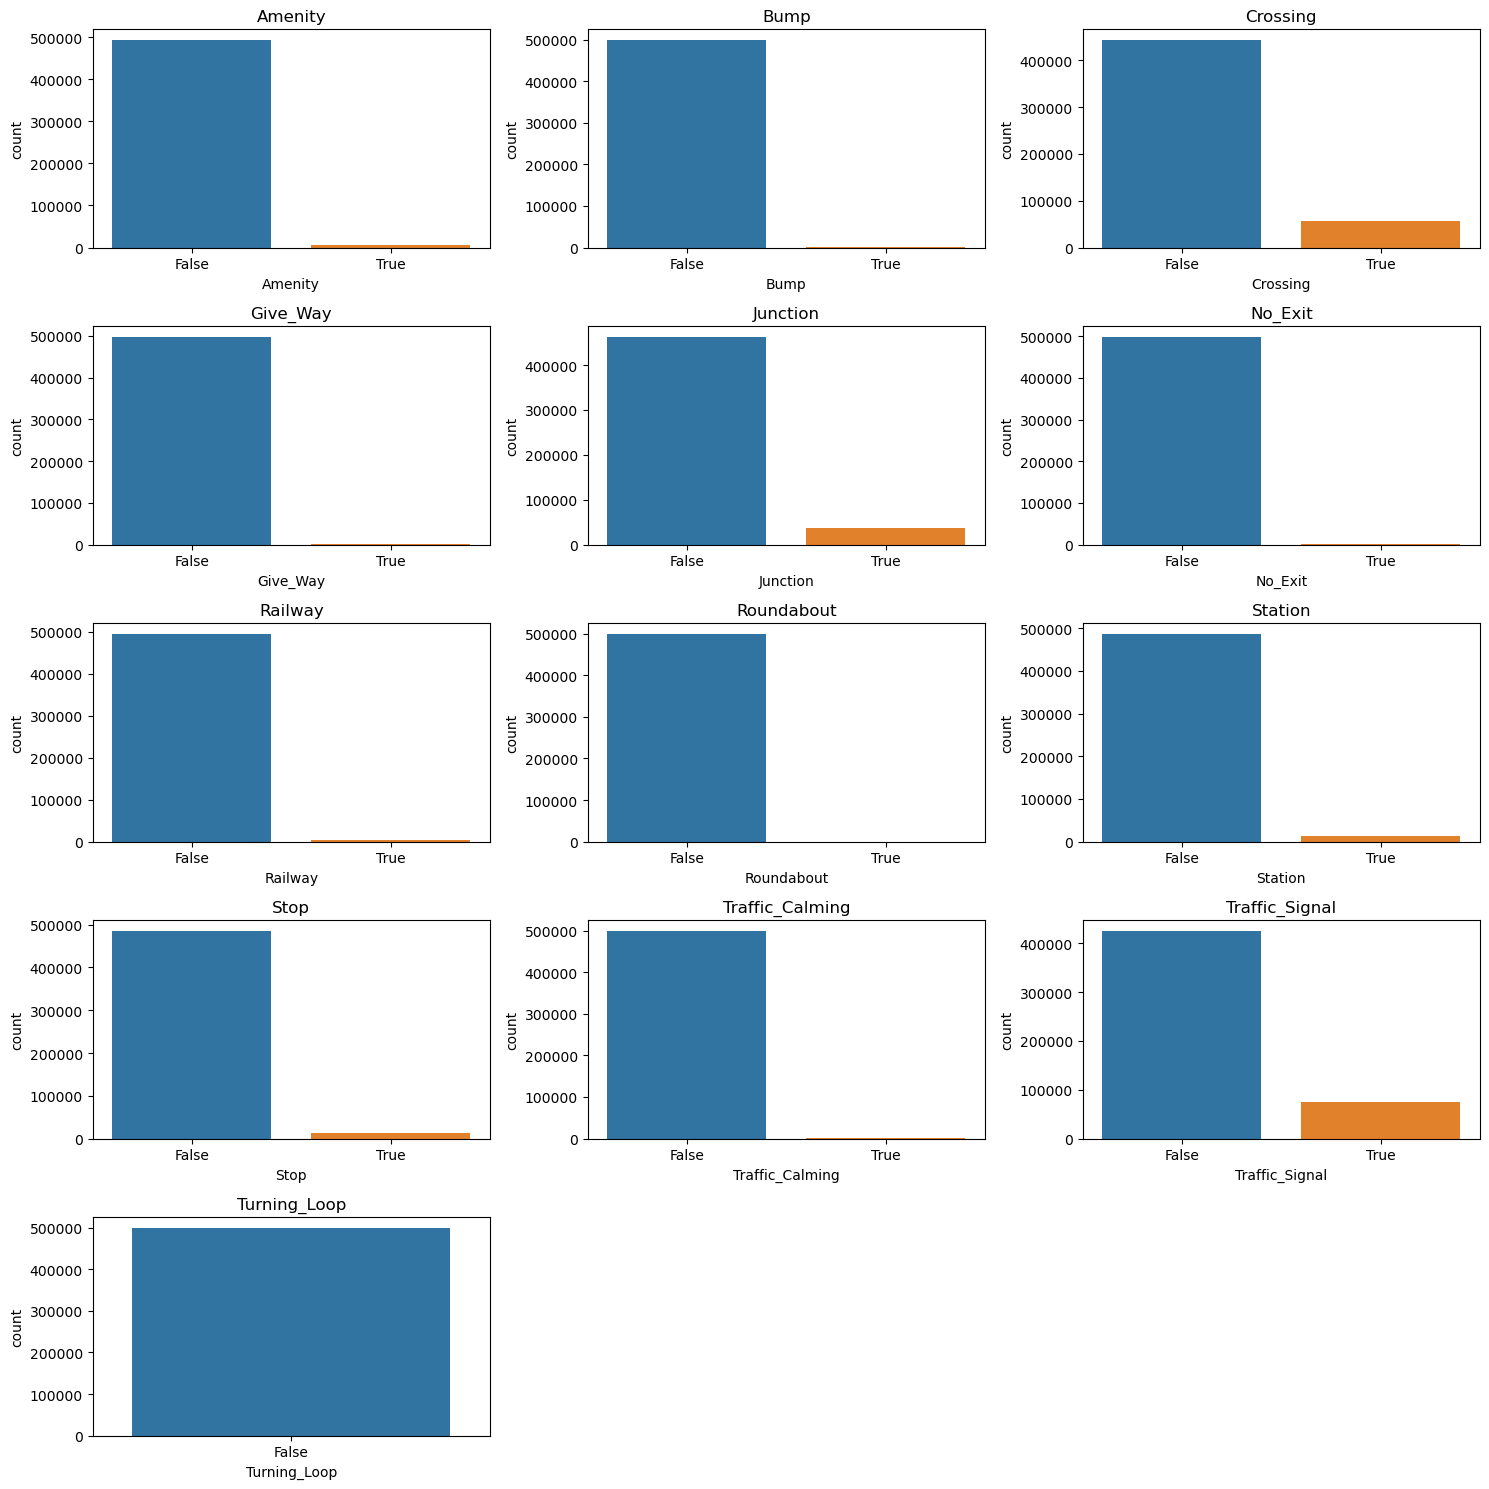

In [15]:
# Number of rows/columns for the subplot grid
n_cols = 3  
n_rows = 5

plt.figure(figsize=(15, 15))

for idx, col in enumerate(col_boolean, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=col, data=col_boolean)
    plt.title(col)

plt.tight_layout()
plt.show()

In [16]:
# Dropping boolean features that dont have sif=gnificant True values 
to_drop = ["Turning_Loop",'Roundabout','Bump','No_Exit','Traffic_Calming','Give_Way','Railway']
df = df.drop(to_drop, axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               500000 non-null  int64         
 1   Start_Time             500000 non-null  datetime64[ns]
 2   Start_Lat              500000 non-null  float64       
 3   Start_Lng              500000 non-null  float64       
 4   Distance(mi)           500000 non-null  float64       
 5   Street                 499309 non-null  object        
 6   City                   499981 non-null  object        
 7   County                 500000 non-null  object        
 8   State                  500000 non-null  object        
 9   Zipcode                499884 non-null  object        
 10  Timezone               499493 non-null  object        
 11  Airport_Code           498554 non-null  object        
 12  Temperature(F)         489534 non-null  floa

In [18]:
# extracting year, month, weekday

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df["Start_Time"].dt.minute

In [19]:
df[['Month','Weekday','Hour','Minute']]

,Month,Weekday,Hour,Minute
0,6,2,10,10
1,12,5,23,37
2,8,5,13,13
3,2,0,17,43
4,12,4,1,46
...,...,...,...,...
499995,12,2,7,30
499996,12,6,16,25
499997,4,2,19,28
499998,5,4,17,20


In [20]:
# Checking numerical columns
num_col = df.select_dtypes(['int64','float64','int32'])
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           500000 non-null  int64  
 1   Start_Lat          500000 non-null  float64
 2   Start_Lng          500000 non-null  float64
 3   Distance(mi)       500000 non-null  float64
 4   Temperature(F)     489534 non-null  float64
 5   Humidity(%)        488870 non-null  float64
 6   Pressure(in)       491072 non-null  float64
 7   Visibility(mi)     488709 non-null  float64
 8   Wind_Speed(mph)    463013 non-null  float64
 9   Precipitation(in)  357384 non-null  float64
 10  Year               500000 non-null  int64  
 11  Month              500000 non-null  int64  
 12  Weekday            500000 non-null  int64  
 13  Hour               500000 non-null  int64  
 14  Minute             500000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 57.2 MB


In [21]:
num_col.isnull().sum()/num_col.shape[0]

Severity             0.000000
Start_Lat            0.000000
Start_Lng            0.000000
Distance(mi)         0.000000
Temperature(F)       0.020932
Humidity(%)          0.022260
Pressure(in)         0.017856
Visibility(mi)       0.022582
Wind_Speed(mph)      0.073974
Precipitation(in)    0.285232
Year                 0.000000
Month                0.000000
Weekday              0.000000
Hour                 0.000000
Minute               0.000000
dtype: float64

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

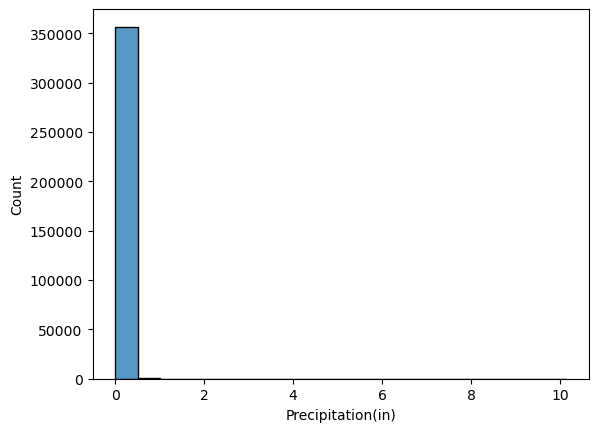

In [22]:
sns.histplot(x=num_col['Precipitation(in)'])

<AxesSubplot:xlabel='Severity', ylabel='Temperature(F)'>

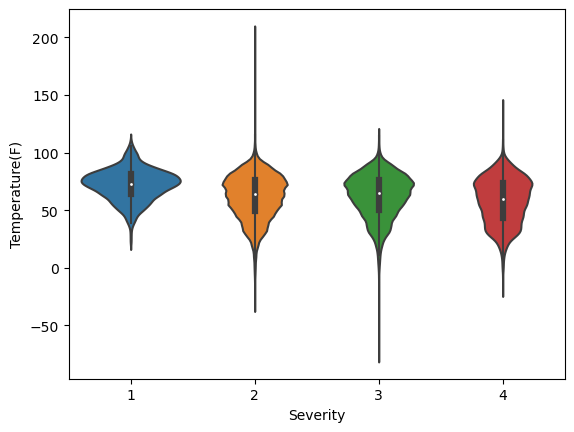

In [23]:
# Severity with Temperature
sns.violinplot(x = df['Severity'],y = num_col['Temperature(F)'])

<Axes: xlabel='Severity', ylabel='Humidity(%)'>

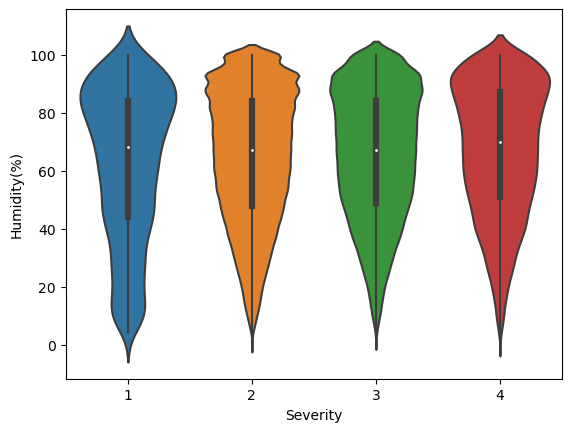

In [22]:
# Severity with Humidity
sns.violinplot(x = df['Severity'],y = num_col['Humidity(%)'])

<Axes: xlabel='Severity', ylabel='Pressure(in)'>

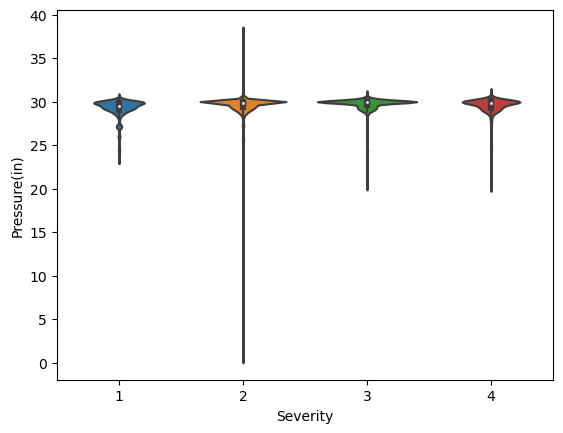

In [23]:
sns.violinplot(x = df['Severity'],y = num_col['Pressure(in)'] )

<Axes: xlabel='Severity', ylabel='Wind_Speed(mph)'>

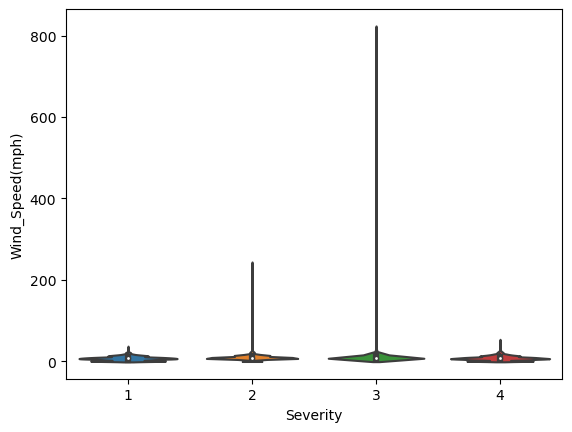

In [24]:
sns.violinplot(x = df['Severity'],y = num_col['Wind_Speed(mph)'])

In [25]:
to_drop =['Distance(mi)','Precipitation(in)','Humidity(%)','Temperature(F)','Wind_Speed(mph)','Visibility(mi)','Pressure(in)']
df = df.drop(to_drop,axis =1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Severity               500000 non-null  int64         
 1   Start_Time             500000 non-null  datetime64[ns]
 2   Start_Lat              500000 non-null  float64       
 3   Start_Lng              500000 non-null  float64       
 4   Distance(mi)           500000 non-null  float64       
 5   Street                 499309 non-null  object        
 6   City                   499981 non-null  object        
 7   County                 500000 non-null  object        
 8   State                  500000 non-null  object        
 9   Zipcode                499884 non-null  object        
 10  Timezone               499493 non-null  object        
 11  Airport_Code           498554 non-null  object        
 12  Temperature(F)         489534 non-null  floa

In [25]:
cat_df = df.select_dtypes('object')
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Street                 499309 non-null  object
 1   City                   499981 non-null  object
 2   County                 500000 non-null  object
 3   State                  500000 non-null  object
 4   Zipcode                499884 non-null  object
 5   Timezone               499493 non-null  object
 6   Airport_Code           498554 non-null  object
 7   Wind_Direction         488803 non-null  object
 8   Weather_Condition      488899 non-null  object
 9   Sunrise_Sunset         498517 non-null  object
 10  Civil_Twilight         498517 non-null  object
 11  Nautical_Twilight      498517 non-null  object
 12  Astronomical_Twilight  498517 non-null  object
dtypes: object(13)
memory usage: 49.6+ MB


In [28]:
for col in cat_df.columns:
    print(col, ":",cat_df[col].value_counts())

Street : Street
I-95 N                 4973
I-95 S                 4866
I-5 N                  4552
I-10 E                 3583
I-10 W                 3484
                       ... 
Old 215 Frontage Rd       1
Elkwood Cir               1
 Alamo Hwy                1
Maynard Aly S             1
 W Spotswood Trl          1
Name: count, Length: 88272, dtype: int64
City : City
Miami            12141
Houston          11031
Los Angeles      10299
Charlotte         8979
Dallas            8245
                 ...  
Newcomerstown        1
Lakehurst            1
New Concord          1
Smithmill            1
Fair Haven           1
Name: count, Length: 9488, dtype: int64
County : County
Los Angeles        34247
Miami-Dade         16248
Orange             15350
Harris             11770
Dallas              9864
                   ...  
Muskogee               1
Niobrara               1
Tom Green              1
Kossuth                1
Chesapeake City        1
Name: count, Length: 1606, dtype: int64

In [26]:
to_drop = ['Airport_Code','Street','County','Zipcode','Airport_Code','Astronomical_Twilight','Nautical_Twilight','Civil_Twilight']
df = df.drop(to_drop, axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           500000 non-null  int64         
 1   Start_Time         500000 non-null  datetime64[ns]
 2   Start_Lat          500000 non-null  float64       
 3   Start_Lng          500000 non-null  float64       
 4   Distance(mi)       500000 non-null  float64       
 5   City               499981 non-null  object        
 6   State              500000 non-null  object        
 7   Timezone           499493 non-null  object        
 8   Temperature(F)     489534 non-null  float64       
 9   Humidity(%)        488870 non-null  float64       
 10  Pressure(in)       491072 non-null  float64       
 11  Visibility(mi)     488709 non-null  float64       
 12  Wind_Direction     488803 non-null  object        
 13  Wind_Speed(mph)    463013 non-null  float64 

In [28]:

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE')|(df['Wind_Direction']=='SE')|(df['Wind_Direction']=='SW'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE')|(df['Wind_Direction']=='NE')|(df['Wind_Direction']=='NW'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['N' 'W' 'E' 'CALM' 'S' 'VAR' nan]


In [29]:
# Create features for some common weather conditions and drop 'Weather_Condition' then.
df['Clear'] = df['Weather_Condition'].str.contains('Clear|Fair|N/A Precipitation', case=False, na = False)
df['Cloud'] = df['Weather_Condition'].str.contains('Cloud|Cloudy|Overcast|Scattered Clouds|Squalls|Funnel Cloud', case=False, na = False)
df['Dust'] = df['Weather_Condition'].str.contains('Dust|Dust Whirlwinds|Widespread Dust|Sand|Volcanic Ash|Windy', case=False, na = False)
df['Fog'] = df['Weather_Condition'].str.contains('Fog|Partial Fog|Patches of Fog|Shallow Fog|Mist|Smoke|Haze|Light Haze|Mist', case=False, na = False)
df['Sleet'] = df['Weather_Condition'].str.contains('Sleet|Light Sleet|Heavy Sleet', case=False, na = False)
df['Snow'] = df['Weather_Condition'].str.contains('Ice Pellets|Light Ice Pellets|Snow|Heavy Snow|Light Snow|Light Snow Grains|Light Snow Shower|Light Snow Showers|Snow Grains|Light Snow|Light Snow Grains|Light|Snow Shower|Light Snow Showers|Heavy Snow|Wintry Mix|Drifting Snow|Low Drifting Snow|Hail|Light Hail|Small Hail', case=False, na = False)
df['Rain'] = df['Weather_Condition'].str.contains('Rain|Rain Shower|Rain Showers|Showers in the Vicinity|Thunderstorms|T-Storm|Heavy Thunderstorms|Light Thunderstorms|Drizzle|Light Drizzle|Heavy Drizzle|Light|Light Drizzle|Light Rain|Light Rain Shower|Light Rain Showers|Light Thunderstorms|Heavy|Heavy Drizzle|Heavy Rain|Heavy T-Storm|Heavy Thunderstorms|Tornado', case=False, na = False)

In [30]:
# mapping weather conditions
import numpy as np

# Conditions for each weather type
conditions = [
    (df['Clear'] == True),  # Check if 'Clear' column is True
    (df['Cloud'] == True),  # Check if 'Cloud' column is True
    (df['Dust'] == True),   # Check if 'Rain' column is True
    (df['Fog'] == True),  # Check if 'Heavy_Rain' column is True
    (df['Sleet'] == True),   # Check if 'Snow' column is True
    (df['Snow'] == True),  # Check if 'Heavy_Snow' column is True
    (df['Rain'] == True)     # Check if 'Fog' column is True
]

# Values to assign for each weather type
weather_types = ['Clear', 'Cloud', 'Dust', 'Fog', 'Sleet', 'Snow', 'Rain']

# Use np.select to create a new column 'Weather_Type' based on conditions
df['Weather_Type'] = np.select(conditions, weather_types, default='Other')

# Print the DataFrame with the new 'Weather_Type' column
# print(df[['Weather_Condition', 'Weather_Type']])

# Drop the original 'Weather_Condition' column
df = df.drop('Weather_Condition', axis=1)

In [31]:
to_drop = ['Clear','Cloud','Dust','Fog','Sleet','Snow','Rain']
df = df.drop(to_drop,axis=1)

In [32]:
df.Weather_Type.unique()

array(['Clear', 'Snow', 'Cloud', 'Fog', 'Rain', 'Other', 'Dust', 'Sleet'],
      dtype=object)

In [33]:
# map boolean columns
features_bool =['Amenity','Crossing','Junction','Station','Stop']
df[features_bool] = df[features_bool].astype(int)

In [34]:
df = df.drop(['Start_Time','Year'],axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           500000 non-null  int64  
 1   Start_Lat          500000 non-null  float64
 2   Start_Lng          500000 non-null  float64
 3   Distance(mi)       500000 non-null  float64
 4   City               499981 non-null  object 
 5   State              500000 non-null  object 
 6   Timezone           499493 non-null  object 
 7   Temperature(F)     489534 non-null  float64
 8   Humidity(%)        488870 non-null  float64
 9   Pressure(in)       491072 non-null  float64
 10  Visibility(mi)     488709 non-null  float64
 11  Wind_Direction     488803 non-null  object 
 12  Wind_Speed(mph)    463013 non-null  float64
 13  Precipitation(in)  357384 non-null  float64
 14  Amenity            500000 non-null  int64  
 15  Crossing           500000 non-null  int64  
 16  Ju

In [36]:
df['Traffic_Signal'] = df['Traffic_Signal'].astype(int)

In [37]:
df.isnull().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
City                     19
State                     0
Timezone                507
Temperature(F)        10466
Humidity(%)           11130
Pressure(in)           8928
Visibility(mi)        11291
Wind_Direction        11197
Wind_Speed(mph)       36987
Precipitation(in)    142616
Amenity                   0
Crossing                  0
Junction                  0
Station                   0
Stop                      0
Traffic_Signal            0
Sunrise_Sunset         1483
Month                     0
Weekday                   0
Hour                      0
Minute                    0
Weather_Type              0
dtype: int64

In [38]:
df = df.dropna()

In [39]:
df.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
City                 0
State                0
Timezone             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Amenity              0
Crossing             0
Junction             0
Station              0
Stop                 0
Traffic_Signal       0
Sunrise_Sunset       0
Month                0
Weekday              0
Hour                 0
Minute               0
Weather_Type         0
dtype: int64

In [40]:
df.shape

(348058, 26)

In [41]:
# label encode categorical variables

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select columns to encode
columns_to_encode = ['City', 'State','Timezone','Wind_Direction','Sunrise_Sunset','Weather_Type']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 348058 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           348058 non-null  int64  
 1   Start_Lat          348058 non-null  float64
 2   Start_Lng          348058 non-null  float64
 3   Distance(mi)       348058 non-null  float64
 4   City               348058 non-null  int64  
 5   State              348058 non-null  int64  
 6   Timezone           348058 non-null  int64  
 7   Temperature(F)     348058 non-null  float64
 8   Humidity(%)        348058 non-null  float64
 9   Pressure(in)       348058 non-null  float64
 10  Visibility(mi)     348058 non-null  float64
 11  Wind_Direction     348058 non-null  int64  
 12  Wind_Speed(mph)    348058 non-null  float64
 13  Precipitation(in)  348058 non-null  float64
 14  Amenity            348058 non-null  int64  
 15  Crossing           348058 non-null  int64  
 16  Ju

In [42]:
# Merging severity levels: 1 and 2 into 0, 3 into 1, and 4 into 2
from sklearn.utils import resample

severity_mapping = {1: 0, 2: 0, 3: 1, 4: 2}
df['Severity_Merged'] = df['Severity'].map(severity_mapping)

# Separate the dataset into the three classes based on the new severity mapping
df_minor = df[df['Severity_Merged'] == 0]
df_major = df[df['Severity_Merged'] == 1]
df_severe = df[df['Severity_Merged'] == 2]

# Calculate the minimum number of samples among all severity classes
min_samples = min(len(df_minor), len(df_major), len(df_severe))

# Undersample each severity class to the minimum number of samples
df_minor_undersampled = resample(df_minor,
                               replace=False,
                               n_samples=min_samples,
                               random_state=123)
df_major_undersampled = resample(df_major,
                               replace=False,
                               n_samples=min_samples,
                               random_state=123)
df_severe_undersampled = resample(df_severe,
                                replace=False,
                                n_samples=min_samples,
                                random_state=123)

# Combine the undersampled majority classes with the minority class
df_undersampled = pd.concat([df_minor_undersampled, df_major_undersampled, df_severe_undersampled])

# Verifying the balance in the new DataFrame
final_severity_counts = df_undersampled['Severity_Merged'].value_counts()
final_severity_counts

0    8272
1    8272
2    8272
Name: Severity_Merged, dtype: int64

<AxesSubplot:xlabel='Severity_Merged', ylabel='count'>

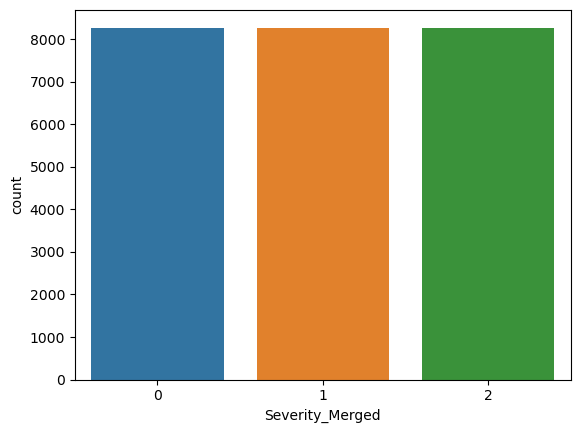

In [43]:
sns.countplot(x=df_undersampled['Severity_Merged'])

In [44]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24816 entries, 225471 to 217074
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           24816 non-null  int64  
 1   Start_Lat          24816 non-null  float64
 2   Start_Lng          24816 non-null  float64
 3   Distance(mi)       24816 non-null  float64
 4   City               24816 non-null  int64  
 5   State              24816 non-null  int64  
 6   Timezone           24816 non-null  int64  
 7   Temperature(F)     24816 non-null  float64
 8   Humidity(%)        24816 non-null  float64
 9   Pressure(in)       24816 non-null  float64
 10  Visibility(mi)     24816 non-null  float64
 11  Wind_Direction     24816 non-null  int64  
 12  Wind_Speed(mph)    24816 non-null  float64
 13  Precipitation(in)  24816 non-null  float64
 14  Amenity            24816 non-null  int64  
 15  Crossing           24816 non-null  int64  
 16  Junction        

In [45]:
df_undersampled.drop('Severity',axis=1, inplace=True)

In [46]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24816 entries, 225471 to 217074
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start_Lat          24816 non-null  float64
 1   Start_Lng          24816 non-null  float64
 2   Distance(mi)       24816 non-null  float64
 3   City               24816 non-null  int64  
 4   State              24816 non-null  int64  
 5   Timezone           24816 non-null  int64  
 6   Temperature(F)     24816 non-null  float64
 7   Humidity(%)        24816 non-null  float64
 8   Pressure(in)       24816 non-null  float64
 9   Visibility(mi)     24816 non-null  float64
 10  Wind_Direction     24816 non-null  int64  
 11  Wind_Speed(mph)    24816 non-null  float64
 12  Precipitation(in)  24816 non-null  float64
 13  Amenity            24816 non-null  int64  
 14  Crossing           24816 non-null  int64  
 15  Junction           24816 non-null  int64  
 16  Station         

In [47]:
df_undersampled.to_csv("df_cleaned.csv")

In [48]:
from sklearn.model_selection import train_test_split


# Features and target variable
X = df_undersampled.drop('Severity_Merged', axis=1)  # Features (all columns except the target)
y = df_undersampled['Severity_Merged']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# `test_size=0.2` means that 20% of the data will be reserved for the test set,
# and 80% will be used for training.
# `random_state` is used for reproducibility of the exact split.

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (19852, 25)
Test set size: (4964, 25)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN with a default k, let's say 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy with k=5:", accuracy_score(y_test, y_pred))


Accuracy with k=5: 0.44460112812248187


/Users/gurjinderpalsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k to try
k_values = range(1, 21)
k_scores = []

# Use cross-validation to find the best k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Best k value
best_k = k_values[np.argmax(k_scores)]
print("Best k value:", best_k)


/Users/gurjinderpalsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/gurjinderpalsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

Best k value: 16


/Users/gurjinderpalsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


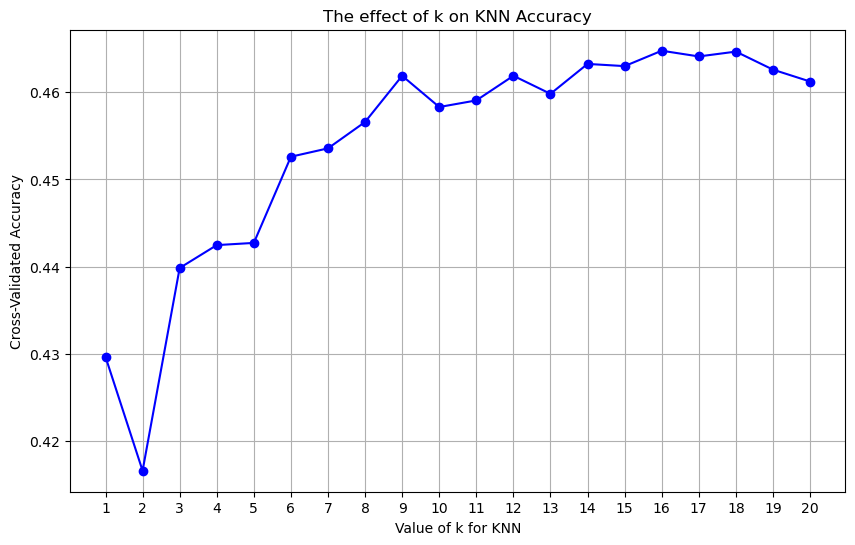

In [51]:
# Plotting the relationship between k and the cross-validated accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('The effect of k on KNN Accuracy')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1.0))
plt.grid(True)
plt.show()

In [54]:
from sklearn.metrics import classification_report
# Initialize KNN with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the training data
knn_best.fit(X_train, y_train)

# Predictions
y_pred_best = knn_best.predict(X_test)

# Evaluate the model
print("Accuracy with best k:", accuracy_score(y_test, y_pred_best))

# classification report
print(classification_report(y_test, y_pred_best))


Accuracy with best k: 0.45507655116841256
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1696
           1       0.43      0.48      0.45      1617
           2       0.48      0.41      0.44      1651

    accuracy                           0.46      4964
   macro avg       0.46      0.46      0.45      4964
weighted avg       0.46      0.46      0.45      4964



/Users/gurjinderpalsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': range(1, 31),  # Example: searching for the best k in 1 to 30
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] #distance metric
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1)


grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


## SVM Model 

In [ ]:
X = df_undersampled.drop('Severity_Merged', axis=1)  # Features (all columns except the target)
y = df_undersampled['Severity_Merged']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# instantiate classifier with polynomial kernel and C=100.0
poly_svc=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


In [ ]:
rbf_svc=SVC(kernel='rbf', C = 1000, gamma = 0.01)


# fit classifier to training set
rbf_svc.fit(X_train,y_train) 


# make predictions on test set
y_pred=rbf_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score is: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

## Logistic regression

In [ ]:
# split X and y into training and testing sets
X = df_undersampled.drop('Severity_Merged', axis=1)  # Features (all columns except the target)
y = df_undersampled['Severity_Merged']  # Target variable

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

## Gradien boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, random_state=1984)
gb.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Making predictions
y_pred = gb.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing results
print("MOdel Data Performance:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

## Random Forest

## ANN Model

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X = df.drop('Severity_Merged', axis=1)
y = df['Severity_Merged']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

accuracy

: 